![logo](images/codete_workshops.jpg)

# NLP for chatbots

During this part of the workshop we explain how to deal with most topics related to NLP. In the first part, we explain some basic methods to handle strings and documents like:
- using regular expression for string processing,
- use NLTK to generate tokens from documents,
- tagging text with NLTK,
- use unicode and normalize strings,
- explain what lemmatization and stemming is,
- analyze text with noun chunks and named entity recognition,
- get to know Bag of Words.

In this section we go through topics related to text understanding. We cover such topics like:
- similarity measures
- word vectors
- Vector Space Model
- type of vectorizers
- build a vectorizer with Tensorflow
- intent and entities in NLU explained.

## NLP process

Based on [1], we have a process that is known to solve most of the NLP problems.

1. Gather your data
2. Clean yout data
3. Find a good representation
4. Classification
5. Inspection
6. Accounting for vocabulary structure
7. Leveraging semantics
8. Leveraging syntax using end-to-end approaches

In this notebook we focus mostly on the second and third part of the process.

## Tools

There are plenty of tools that can be used for NLP. A few most popular are:
- Regular expression,
- NLTK [www.nltk.org](NLTK),
- TextBlob [http://textblob.readthedocs.io/en/dev/](TextBlob),
- SpaCy [spacy.io](SpaCy),
- coreNLP [https://stanfordnlp.github.io/CoreNLP/](coreNLP).

### NLTK

We can use some available data sets for educational purpose. One of such source are NLTK book corporas. To download it we need to do the following:

In [2]:
import nltk
nltk.download('book')

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /home/codete/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /home/codete/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     /home/codete/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /home/codete/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     /home/codete/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     /home/codete/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    | Downloading package dependency_t

True

To check what kind of books are available we need to import these and print the list as following:

In [3]:
from nltk.book import *
texts()

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


NLTK Text object does have some useful methods that you can find here: [NLTK Text Docs](http://www.nltk.org/api/nltk.html#nltk.text.Text). Some are used below.

#### Word and sentences similarity

Word does have different meanings. This makes the comparison and analysis a bit more complex.

In [4]:
text6.concordance("King")

text6.count("King")

Displaying 25 of 25 matches:
 KING ARTHUR : Whoa there ! [ clop clop clo
dragon , from the castle of Camelot . King of the Britons , defeator of the Saxo
? CART - MASTER : I dunno . Must be a king . CUSTOMER : Why ? CART - MASTER : He
t all over him . SCENE 3 : [ thud ] [ King Arthur music ] [ thud thud thud ] [ K
g Arthur music ] [ thud thud thud ] [ King Arthur music stops ] ARTHUR : Old wom
ke an inferior ! ARTHUR : Well , I am king ! DENNIS : Oh king , eh , very nice .
THUR : Well , I am king ! DENNIS : Oh king , eh , very nice . And how d ' you ge
do you do , good lady . I am Arthur , King of the Britons . Who ' s castle is th
ns . Who ' s castle is that ? WOMAN : King of the who ? ARTHUR : The Britons . W
 . We are all Britons , and I am your king . WOMAN : I didn ' t know we had a ki
ng . WOMAN : I didn ' t know we had a king . I thought we were an autonomous col
hink he is ? Heh . ARTHUR : I am your king ! WOMAN : Well , I didn ' t vote for 
s . WOMAN : Well , how did you becom

27

#### Exercise 1: Find the number of occurency of word 'money' in Wall Street Journal corpora.

Compare it with the same solution done using regular expressions.

In [ ]:
### place your code here

We can also build a Corpus from a plain text. See the example below.

In [5]:
from nltk.corpus import PlaintextCorpusReader
from nltk.tokenize.regexp import WordPunctTokenizer
from nltk.data import LazyLoader

trump = PlaintextCorpusReader('./datasets/','Trump_2017.txt',word_tokenizer=WordPunctTokenizer(),
             sent_tokenizer=LazyLoader(
                 'tokenizers/punkt/english.pickle'),
             encoding='utf8')
print(trump)
trump.words()

<PlaintextCorpusReader in '/home/codete/workshop/datasets'>


['Thank', 'you', 'very', 'much', '.', 'Mr', '.', ...]

Corpuses contain large amount of texts, say multiple books, couple hundreds of articles from various magazines etc. NLTK has chosen a few books from over 25,000 pieces available in the whole dataset. We are going to pick Bible and Shakespeare's Macbeth in order to compare a few statistics between them. Let's take a look at other corporas and check the gutenberg and check the word distribution:

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid') # general display style of seaborn
# how to display plot in notebook, jupyter's magic command
%matplotlib inline 

# Download necessary texts
nltk.download('gutenberg')
nltk.download('stopwords')

print("Books available in gutenberg dataset:")
nltk.corpus.gutenberg.fileids()

[nltk_data] Downloading package gutenberg to /home/codete/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!
[nltk_data] Downloading package stopwords to /home/codete/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
Books available in gutenberg dataset:


['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [7]:
nltk.corpus.stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Macbeth richness: 0.17359550561797754
Bible richness: 0.01362385148626533
Words occuring most often in Bible:


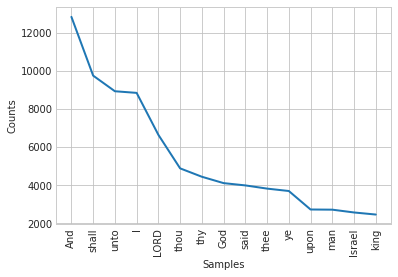

None

In [10]:
def lexical_richness(text: str) -> float:
  # Unique words in text divided by the total amount of words
  words = nltk.Text(nltk.corpus.gutenberg.words(text))
  return len(set(words))/len(words)

macbeth = "shakespeare-macbeth.txt"
bible = "bible-kjv.txt"

print("Macbeth richness: {}".format(lexical_richness(macbeth)))
print("Bible richness: {}".format(lexical_richness(bible)))

# Removing stopwords like: , . and or
bible_words = [
    word
    for word in nltk.corpus.gutenberg.words(bible)
    if word not in nltk.corpus.stopwords.words("english") and word.isalpha()
]

words_distribution = nltk.probability.FreqDist(bible_words)
print("Words occuring most often in Bible:") 
display(words_distribution.plot(15))

### Regular expression

The first solution that comes to our mind when it comes to text processing are regular expression. It is usually the best solution in software development. It is also used in many tools that we have mentioned before. Let's take an example to do a short recap how to use regular expressions in Python.

In [11]:
example = "Codete is a great company with many great developers."

import re

pattern = "\\s+"
words = re.split(pattern, example)
print(words)

['Codete', 'is', 'a', 'great', 'company', 'with', 'many', 'great', 'developers.']


Python does have some methods for Strings that can do the same as above, but with less code.

In [18]:
words = example.split(' ')
print(words)

text = "Well, what can I say about regexes? \
They are quite annoying to be honest, but once you get a grasp you're gonna be fine. \
Yeah, I could use some basic boring text, here you go if that's what you miss: \
Ala ma kota, kot ma Alę. m?ke a m1sta.e and see what happens... \
This sentence: 'Mr. & Mrs. Smith, been looking for easter egg here, failed."
text.split(' ')

['Codete', 'is', 'a', 'great', 'company', 'with', 'many', 'great', 'developers.']


['Well,',
 'what',
 'can',
 'I',
 'say',
 'about',
 'regexes?',
 'They',
 'are',
 'quite',
 'annoying',
 'to',
 'be',
 'honest,',
 'but',
 'once',
 'you',
 'get',
 'a',
 'grasp',
 "you're",
 'gonna',
 'be',
 'fine.',
 'Yeah,',
 'I',
 'could',
 'use',
 'some',
 'basic',
 'boring',
 'text,',
 'here',
 'you',
 'go',
 'if',
 "that's",
 'what',
 'you',
 'miss:',
 'Ala',
 'ma',
 'kota,',
 'kot',
 'ma',
 'Alę.',
 'm?ke',
 'a',
 'm1sta.e',
 'and',
 'see',
 'what',
 'happens...',
 'This',
 'sentence:',
 "'Mr.",
 '&',
 'Mrs.',
 'Smith,',
 'been',
 'looking',
 'for',
 'easter',
 'egg',
 'here,',
 'failed.']

That was too naive, let's make something more intelligent:

In [19]:
print("Using regex:")
display(re.split('(?<=[.!?]) +',text))

Using regex:


['Well, what can I say about regexes?',
 "They are quite annoying to be honest, but once you get a grasp you're gonna be fine.",
 "Yeah, I could use some basic boring text, here you go if that's what you miss: Ala ma kota, kot ma Alę.",
 'm?ke a m1sta.e and see what happens...',
 "This sentence: 'Mr.",
 '& Mrs.',
 'Smith, been looking for easter egg here, failed.']

Our regex only splits the text if either of . ! ? is followed by one or more whitespace signs. This approach is quite powerful, yet limited (as could be seen), keep in mind it has it's uses but is far from perfect (later we will see more sophisticated approaches).

All in all, when faced with a choice: do something using traditional methods or using machine learning, ALWAYS pick the first one.

In [20]:
# Examples of some other regex functions

text = re.sub(r"Mr. & Mrs. Smith", "Now works like a charm", text) #substitute string
found_text = re.findall(", been .*,", text) # find all occurences of string
display(found_text)

# findall returns list, we need to access it's element
re.sub(found_text[0], " but life", text)

[', been looking for easter egg here,']

"Well, what can I say about regexes? They are quite annoying to be honest, but once you get a grasp you're gonna be fine. Yeah, I could use some basic boring text, here you go if that's what you miss: Ala ma kota, kot ma Alę. m?ke a m1sta.e and see what happens... This sentence: 'Now works like a charm but life failed."

### Tokenization

NLTK is a more advanced tool than just regular expressions. We can easily tokenize sentences. Tokenization is a process of getting words from sentences. **Tokenizers** are used to divide a string into it's logical subsets. Above, we have used the sentence tokenizer. Tokenization on the other hand is a common name for dividing a text into separate words and can be done in NLTK using word_tokenizer:

In [27]:
tokens = nltk.word_tokenize(example)
print("Tokens: " + str(tokens))

Tokens: ['Codete', 'is', 'a', 'great', 'company', 'with', 'many', 'great', 'developers', '.']


After a little fun we can use nltk to separate text into sentences in 'smarter' fashion:

In [28]:
from nltk.tokenize import sent_tokenize

nltk.download('punkt')

sent_tokenize(text)

[nltk_data] Downloading package punkt to /home/codete/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


['Here we go again.',
 "I was supposed to add this text later.Well, it's 10.p.m.",
 "here, and I'm actually having fun making this course.",
 ':oI hope you are getting along fine with this presentation, I really did try.And one last sentence, just so you can test you tokenizers better.']

__Tokenizers__ are used to divide a string into it's logical subsets. Above, we
have used
the sentence tokenizer. __Tokenization__ on the other hand is a common
name for dividing
a text into separate words and can be done in NLTK using
__word_tokenizer__:

In [23]:
from nltk.tokenize import word_tokenize, TweetTokenizer
from nltk.tokenize import TweetTokenizer # Yes, this tokenizer was based on Tweets

text = "This is a cooool #dummysmiley: :-) :-P <3 and some arrows < > -> <--"
print("Normal tokenizer:")
print(word_tokenize(text))

print("This tokenizer is better suited for emoji handling")
twitter_tokenizer = TweetTokenizer()
twitter_tokenizer.tokenize(text)

Normal tokenizer:
['This', 'is', 'a', 'cooool', '#', 'dummysmiley', ':', ':', '-', ')', ':', '-P', '<', '3', 'and', 'some', 'arrows', '<', '>', '-', '>', '<', '--']
This tokenizer is better suited for emoji handling


['This',
 'is',
 'a',
 'cooool',
 '#dummysmiley',
 ':',
 ':-)',
 ':-P',
 '<3',
 'and',
 'some',
 'arrows',
 '<',
 '>',
 '->',
 '<--']

As you can see there are other tokenizers available and each is focused on
different
'kind' of tokenization.

They are usually implemented as a set of
complicated rules trailed down to certain language
(e.g. will be different for
polish and english) and __ARE NOT__ a subset of machine
learning (in
this part of course at least).

Here are some other NLTK's tokenizers you could
use:

- __PunktTokenizer__: been used above for sentence tokenization. This one
actually uses unsupervised algorithm to infer sentence boundaries.
- __NISTTokenizer__: tokenizer for non-european text (say in Chinese).
- __SExprTokenizer__: find parenthesized expressions in strings, see below:

In [24]:
from nltk.tokenize import SExprTokenizer

SExprTokenizer().tokenize('(a b (c d)) e f (g)')

['(a b (c d))', 'e', 'f', '(g)']

#### Exercise 2. Build your own tokenizer

- __RegexpTokenizer__: splits text based on regex you provide. 

This tokenizer is a major part of __your task!__

Check documentation [here](https://www.nltk.org/api/nltk.tokenize.html#module-nltk.tokenize.regexp)
and create two tokenizers:

- tokenize_sentence: function tokenizing text into sentences using nltk.tokenize.RegexpTokenizer
- tokenize_word: function tokenizing text into words using nltk.tokenize.RegexpTokenizer

Check your results, what did you miss? Where did it fail?

In [25]:
from typing import List

def tokenize_words(text: str) -> list:
    """Tokenize text into words using regex.

    Parameters
    ----------
    text: str
            Text to be tokenized

    Returns
    -------
    List[str]
            List containing words tokenized from text

    """
    pass

def tokenize_sentence(text: str) -> list:
    """Tokenize text into words using regex.

    Parameters
    ----------
    text: str
            Text to be tokenized

    Returns
    -------
    List[str]
            List containing words tokenized from text

    """
    pass

text = "Here we go again. I was supposed to add this text later.\
Well, it's 10.p.m. here, and I'm actually having fun making this course. :o\
I hope you are getting along fine with this presentation, I really did try.\
And one last sentence, just so you can test you tokenizers better."

print("Tokenized sentences:")
print(tokenize_sentence(text))

print("Tokenized words:")
print(tokenize_words(text))

Tokenized sentences:
None
Tokenized words:
None


### Tagging

What is great with NLTK is that we can tag each word. A tag give us a meaning of a word. We can think about it as a type of word.

In [26]:
tags = nltk.pos_tag(tokens)
print("Tagged: " + str(tags))

Tagged: [('Codete', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('great', 'JJ'), ('company', 'NN'), ('with', 'IN'), ('many', 'JJ'), ('great', 'JJ'), ('developers', 'NNS'), ('.', '.')]


Some tags are shown in the table below.

| tag  | short | description   |
|------|-------|---------------|
| DT   | determiner | all an another any both del each either every half la many much nary neither no some such that the them these this those |
| IN   | preposition or conjunction, subordinating | astride among uppon whether out inside pro despite on by throughout below within for towards near behind atop around if like until below next into if beside ... |
| JJ   | adjective or numeral, ordinal | third ill-mannered pre-war regrettable oiled calamitous first separable ectoplasmic battery-powered participatory fourth still-to-be-named multilingual multi-disciplinary ... |
| NN   | noun, common, singular or mass | common-carrier cabbage knuckle-duster Casino afghan shed thermostat investment slide humour falloff slick wind hyena override subhumanity machinist ... |
| NNP  | noun, proper, singular | Motown Venneboerger Czestochowa Ranzer Conchita Trumplane Christos Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA Shannon A.K.C. Meltex Liverpool ... |
| NNS  | noun, common, plural | undergraduates scotches bric-a-brac products bodyguards facets coasts divestitures storehouses designs clubs fragrances averages subjectivists apprehensions muses factory-jobs ... |
| VBZ  | verb, present tense, 3rd person singular | bases reconstructs marks mixes displeases seals carps weaves snatches slumps stretches authorizes smolders pictures emerges stockpiles seduces fizzes uses bolsters slaps speaks pleads ... |

To get the full list of tags, use the following code:

In [29]:
nltk.download('tagsets')
nltk.help.upenn_tagset()

[nltk_data] Downloading package tagsets to /home/codete/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
   

We can find the token in NLTK's corporas too:

In [30]:
text6.tokens

['SCENE',
 '1',
 ':',
 '[',
 'wind',
 ']',
 '[',
 'clop',
 'clop',
 'clop',
 ']',
 'KING',
 'ARTHUR',
 ':',
 'Whoa',
 'there',
 '!',
 '[',
 'clop',
 'clop',
 'clop',
 ']',
 'SOLDIER',
 '#',
 '1',
 ':',
 'Halt',
 '!',
 'Who',
 'goes',
 'there',
 '?',
 'ARTHUR',
 ':',
 'It',
 'is',
 'I',
 ',',
 'Arthur',
 ',',
 'son',
 'of',
 'Uther',
 'Pendragon',
 ',',
 'from',
 'the',
 'castle',
 'of',
 'Camelot',
 '.',
 'King',
 'of',
 'the',
 'Britons',
 ',',
 'defeator',
 'of',
 'the',
 'Saxons',
 ',',
 'sovereign',
 'of',
 'all',
 'England',
 '!',
 'SOLDIER',
 '#',
 '1',
 ':',
 'Pull',
 'the',
 'other',
 'one',
 '!',
 'ARTHUR',
 ':',
 'I',
 'am',
 ',',
 '...',
 'and',
 'this',
 'is',
 'my',
 'trusty',
 'servant',
 'Patsy',
 '.',
 'We',
 'have',
 'ridden',
 'the',
 'length',
 'and',
 'breadth',
 'of',
 'the',
 'land',
 'in',
 'search',
 'of',
 'knights',
 'who',
 'will',
 'join',
 'me',
 'in',
 'my',
 'court',
 'at',
 'Camelot',
 '.',
 'I',
 'must',
 'speak',
 'with',
 'your',
 'lord',
 'and',
 'ma

Another feature of NLTK are the stopwords that are used in each language that NLTK supports:

In [31]:
english_stopwords = set(nltk.corpus.stopwords.words('english'))
print(english_stopwords)

{'wasn', 're', 'haven', "haven't", 'be', 'until', 'were', 'if', 'before', 'aren', 'are', 'while', 'hadn', 'for', 'their', 'needn', 'won', 'doing', 'how', 'mustn', 'just', 'such', 'off', 'is', 'ma', 'which', 'i', 'few', 'theirs', 'own', 'now', 'weren', "shan't", 'her', 'having', 'with', 'both', "don't", 'them', 'its', 'ours', 'who', "wasn't", 't', 'after', 'ourselves', 'then', 'am', 's', 'too', 'does', 'when', "didn't", 'my', 'd', "weren't", "doesn't", 'these', 'as', 'out', 'into', "hasn't", 'we', 'why', 'to', 'where', 'had', 'a', 'once', 'each', 'herself', 'only', 'did', "won't", "you've", 'whom', 've', 'couldn', 'and', 'his', 'not', 'nor', 'over', 'your', "it's", 'no', 'there', 'that', 'don', 'doesn', 'in', 'me', 'about', 'wouldn', 'at', "should've", 'what', "mightn't", 'on', 'was', 'any', 'myself', 'from', "you're", 'yours', 'shouldn', 'has', 'more', 'our', 'an', 'most', 'you', 'do', 'here', "you'll", 'ain', "wouldn't", "isn't", 'the', 'o', 'again', 'between', 'isn', 'some', 'mightn'

__POS-tagging__ is another method of describing our text. For each tokenized word we can obtain it's __Part Of Speech__. Those informations are frequently used throughout more advanced machine learning methods.

Up until now everything was easy, fortunately this one is no exception.

In [32]:
# we have already imported nltk.tokenize.word_tokenizer

nltk.download('averaged_perceptron_tagger')

words = word_tokenize(
    "Another text. You know, this is the hardest part, coming up with all those texts. "
    "Lorem Ipsum or some random stuff is pretty boring IMO. "
    "You may feel like somebody didn't care (or at least I do)."
    "Or maybe it's just an act? I will not address this question."
)

nltk.pos_tag(words)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/codete/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Another', 'DT'),
 ('text', 'NN'),
 ('.', '.'),
 ('You', 'PRP'),
 ('know', 'VBP'),
 (',', ','),
 ('this', 'DT'),
 ('is', 'VBZ'),
 ('the', 'DT'),
 ('hardest', 'JJS'),
 ('part', 'NN'),
 (',', ','),
 ('coming', 'VBG'),
 ('up', 'RP'),
 ('with', 'IN'),
 ('all', 'PDT'),
 ('those', 'DT'),
 ('texts', 'NNS'),
 ('.', '.'),
 ('Lorem', 'NNP'),
 ('Ipsum', 'NNP'),
 ('or', 'CC'),
 ('some', 'DT'),
 ('random', 'JJ'),
 ('stuff', 'NN'),
 ('is', 'VBZ'),
 ('pretty', 'JJ'),
 ('boring', 'JJ'),
 ('IMO', 'NNP'),
 ('.', '.'),
 ('You', 'PRP'),
 ('may', 'MD'),
 ('feel', 'VB'),
 ('like', 'IN'),
 ('somebody', 'NN'),
 ('did', 'VBD'),
 ("n't", 'RB'),
 ('care', 'VB'),
 ('(', '('),
 ('or', 'CC'),
 ('at', 'IN'),
 ('least', 'JJS'),
 ('I', 'PRP'),
 ('do', 'VBP'),
 (')', ')'),
 ('.Or', 'VB'),
 ('maybe', 'RB'),
 ('it', 'PRP'),
 ("'s", 'VBZ'),
 ('just', 'RB'),
 ('an', 'DT'),
 ('act', 'NN'),
 ('?', '.'),
 ('I', 'PRP'),
 ('will', 'MD'),
 ('not', 'RB'),
 ('address', 'VB'),
 ('this', 'DT'),
 ('question', 'NN'),
 ('.', '.')]

Look at `act` and `address` towards the end of output.

POS can be used to dismabiguate word meaning, `act` can be both noun (NN) and verb (VB), same goes for address. 

This tokenizer is __based on simple one layer neural network__ hence it takes context into account (words before and after an act). 

Context (N words before and after certain word) is called __N-gram__ in Machine Learning and we will make use of it more later in this course.

<ADD N-GRAM PHOTO>

This is more sophisticated approach and __should be__ used when more abstract reasoning is needed (like word disambiguation).

With __NLTK__ we can create and train our own taggers, or choose a pre-made one and train is as seen below (this one takes the next word as it's context).

In [33]:
import nltk
from nltk.corpus import brown 
nltk.download("brown")
 
brown_tagged_sents = brown.tagged_sents(categories="news")
brown_sents = brown.sents(categories="news") 
unigram_tagger = nltk.BigramTagger(brown_tagged_sents)
unigram_tagger.tag(brown_sents[2007])

[nltk_data] Downloading package brown to /home/codete/nltk_data...
[nltk_data]   Package brown is already up-to-date!


[('Various', 'JJ'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('apartments', 'NNS'),
 ('are', 'BER'),
 ('of', 'IN'),
 ('the', 'AT'),
 ('terrace', 'NN'),
 ('type', 'NN'),
 (',', ','),
 ('being', 'BEG'),
 ('on', 'IN'),
 ('the', 'AT'),
 ('ground', 'NN'),
 ('floor', 'NN'),
 ('so', 'CS'),
 ('that', 'CS'),
 ('entrance', 'NN'),
 ('is', 'BEZ'),
 ('direct', 'JJ'),
 ('.', '.')]

#### Exercise 3: Get tags from Trump speech.

You should use the Trump_2017.txt file, read it and find the tags for each word. Use NLTK for it.

In [ ]:
file = open("", "r",encoding="utf-8") 
trump = file.read() 

### here goes your code

### Unicode

Each alphabet is different and some languages use letter that are not used in any other language. Unicode allows use to standardize the text. Let's see an of some german and portugese text below.

In [34]:
sample = """Minderjährige Schülerinnen. O português é uma língua romântica"""

type(sample)

str

If we convert it to ASCII it will look as following:

In [35]:
ascii(sample)

"'Minderj\\xe4hrige Sch\\xfclerinnen. O portugu\\xeas \\xe9 uma l\\xedngua rom\\xe2ntica'"

It is not what we expected. It's hard to work with such a text. We can go a step further and encode the string to be a unicode encoded one:

In [36]:
sample.encode('utf8')

b'Minderj\xc3\xa4hrige Sch\xc3\xbclerinnen. O portugu\xc3\xaas \xc3\xa9 uma l\xc3\xadngua rom\xc3\xa2ntica'

We could also ignore the ASCII characters that we cannot do anything with in the further processing:

In [37]:
sample.encode('ascii', 'ignore')

b'Minderjhrige Schlerinnen. O portugus  uma lngua romntica'

Now we have all letter that make sense, but we have text that does not make any sense anymore. To solve it, we need to normalize it and only after the normalization remove the ascii signs.

In [38]:
import unicodedata

unicodedata.normalize('NFKD', sample).encode('ascii','ignore')

b'Minderjahrige Schulerinnen. O portugues e uma lingua romantica'

More about [Unicode normalization forms](http://unicode.org/reports/tr15/)

### Lemmatization

Lemmatization is a process of getting one word for many forms of the word. Let's see an example:

In [39]:
from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

print(wordnet_lemmatizer.lemmatize('do',pos='v'))
print(wordnet_lemmatizer.lemmatize('does',pos='v'))
print(wordnet_lemmatizer.lemmatize('doing',pos='v'))

do
do
do


We can set the main part of speech as one of the following:

ADJ, ADJ_SAT, ADV, NOUN, VERB = 'a', 's', 'r', 'n', 'v'

In [40]:
wordnet_lemmatizer.lemmatize('are',pos='v')

'be'

### Stemming

Stemming is similar to lemmatization, but the main difference is that is just reduce the word to it root. It gives in many cases different results than lemmatization as the second solution is based on part of speech.

In [41]:
from nltk import PorterStemmer, LancasterStemmer, word_tokenize
from nltk.stem.snowball import SnowballStemmer

sample = "This is a new training about machine learning usage for chatbots"

tokens = word_tokenize(sample)

porter = PorterStemmer()
p_stem = [porter.stem(t) for t in tokens]
print(p_stem)

lancaster = LancasterStemmer()
l_stem = [lancaster.stem(t) for t in tokens]
print(l_stem)

snowball = SnowballStemmer('english')
s_stem = [snowball.stem(t) for t in tokens]
print(s_stem)

['thi', 'is', 'a', 'new', 'train', 'about', 'machin', 'learn', 'usag', 'for', 'chatbot']
['thi', 'is', 'a', 'new', 'train', 'about', 'machin', 'learn', 'us', 'for', 'chatbot']
['this', 'is', 'a', 'new', 'train', 'about', 'machin', 'learn', 'usag', 'for', 'chatbot']


As per usual there are other stemmers and lemmatizers available in NLTK. 
Some
of them may be faster (PorterStemmer), but Snowball is considered de-facto
standard.

A few traits of each should be noticed:
- Stemming is faster (it
doesn't have to consult dictionary and complicated
morphological rules).
-
Stemming may not produce a dictionary word, see `studi` above.
- Lemmatization
produces smaller set of words. It is useful as we do not have to keep
track of
all the different form of word (running, runner, runs etc.). More memory
efficient.
- Lemmatization is not as crude, when it does not find the lemma it
returns the original
form. It __may__ produce more words this way, depends on
the kind of text we are
processing.

### Sentence extraction

In this section we show some features of SpaCy. One of the most commonly used is the sentence extraction. An example of Trump speech divided into sentences can be found below.

In [45]:
import spacy

file = open("./datasets/Trump_2017.txt", "r",encoding='utf-8') 
trump = file.read() 

nlp = spacy.load("en_core_web_sm")
doc = nlp(trump)

for span in doc.sents:
    print("> ", span)

>  Thank you very much.
>  Mr. Speaker, Mr. Vice President, Members of Congress, the First Lady of the United States, and citizens of America:
>  Tonight, as we mark the conclusion of our celebration of Black History Month, we are reminded of our Nation's path towards civil rights and the work that still remains to be done.
>  Recent threats targeting Jewish community centers and vandalism of Jewish cemeteries, as well as last week's shooting in Kansas City, remind us that while we may be a nation divided on policies, we are a country that stands united in condemning hate and evil in all of its very ugly forms.

>  Each American generation passes the torch of truth, liberty, and justice in an unbroken chain, all the way down to the present.
>  That torch is now in our hands, and we will use it to light up the world.
>  I am here tonight to deliver a message of unity and strength, and it is a message deeply delivered from my heart.
>  A new chapter of American greatness is now beginning

Each sentence can next be tokenized and we can get a tag and pos of it.

In [46]:
for span in doc.sents:
    for i in range(span.start, span.end):
        token = doc[i]
        print(i, token.text, token.tag_, token.pos_)

0 Thank VBP VERB
1 you PRP PRON
2 very RB ADV
3 much RB ADV
4 . . PUNCT
5 Mr. NNP PROPN
6 Speaker NNP PROPN
7 , , PUNCT
8 Mr. NNP PROPN
9 Vice NNP PROPN
10 President NNP PROPN
11 , , PUNCT
12 Members NNP PROPN
13 of IN ADP
14 Congress NNP PROPN
15 , , PUNCT
16 the DT DET
17 First NNP PROPN
18 Lady NNP PROPN
19 of IN ADP
20 the DT DET
21 United NNP PROPN
22 States NNP PROPN
23 , , PUNCT
24 and CC CCONJ
25 citizens NNS NOUN
26 of IN ADP
27 America NNP PROPN
28 : : PUNCT
29 Tonight NN NOUN
30 , , PUNCT
31 as IN ADP
32 we PRP PRON
33 mark VBP VERB
34 the DT DET
35 conclusion NN NOUN
36 of IN ADP
37 our PRP$ ADJ
38 celebration NN NOUN
39 of IN ADP
40 Black NNP PROPN
41 History NNP PROPN
42 Month NNP PROPN
43 , , PUNCT
44 we PRP PRON
45 are VBP VERB
46 reminded VBN VERB
47 of IN ADP
48 our PRP$ ADJ
49 Nation NN NOUN
50 's POS PART
51 path NN NOUN
52 towards IN ADP
53 civil JJ ADJ
54 rights NNS NOUN
55 and CC CCONJ
56 the DT DET
57 work NN NOUN
58 that WDT ADJ
59 still RB ADV
60 remains VBZ V

568 the DT DET
569 people NNS NOUN
570 turned VBD VERB
571 out RP PART
572 by IN ADP
573 the DT DET
574 tens NNS NOUN
575 of IN ADP
576 millions NNS NOUN
577 , , PUNCT
578 and CC CCONJ
579 they PRP PRON
580 were VBD VERB
581 all DT DET
582 united VBN VERB
583 by IN ADP
584 one CD NUM
585 very RB ADV
586 simple JJ ADJ
587 , , PUNCT
588 but CC CCONJ
589 crucial JJ ADJ
590 demand NN NOUN
591 : : PUNCT
592 that IN ADP
593 America NNP PROPN
594 must MD VERB
595 put VB VERB
596 its PRP$ ADJ
597 own JJ ADJ
598 citizens NNS NOUN
599 first RB ADV
600 . . PUNCT
601 Because IN ADP
602 only RB ADV
603 then RB ADV
604 can MD VERB
605 we PRP PRON
606 truly RB ADV
607 make VB VERB
608 America NNP PROPN
609 great JJ ADJ
610 again RB ADV
611 . . PUNCT
612 

 _SP SPACE
613 Dying NN NOUN
614 industries NNS NOUN
615 will MD VERB
616 come VB VERB
617 roaring VBG VERB
618 back RB ADV
619 to IN ADP
620 life NN NOUN
621 . . PUNCT
622 Heroic JJ ADJ
623 veterans NNS NOUN
624 will MD VERB
625 get VB VERB
626 the

1193 have VBP VERB
1194 become VBN VERB
1195 so RB ADV
1196 badly RB ADV
1197 addicted JJ ADJ
1198 . . PUNCT
1199 

 _SP SPACE
1200 At IN ADP
1201 the DT DET
1202 same JJ ADJ
1203 time NN NOUN
1204 , , PUNCT
1205 my PRP$ ADJ
1206 administration NN NOUN
1207 has VBZ VERB
1208 answered VBN VERB
1209 the DT DET
1210 pleas NNS NOUN
1211 of IN ADP
1212 the DT DET
1213 American JJ ADJ
1214 people NNS NOUN
1215 for IN ADP
1216 immigration NN NOUN
1217 enforcement NN NOUN
1218 and CC CCONJ
1219 border NN NOUN
1220 security NN NOUN
1221 . . PUNCT
1222 By IN ADP
1223 finally RB ADV
1224 enforcing VBG VERB
1225 our PRP$ ADJ
1226 immigration NN NOUN
1227 laws NNS NOUN
1228 , , PUNCT
1229 we PRP PRON
1230 will MD VERB
1231 raise VB VERB
1232 wages NNS NOUN
1233 , , PUNCT
1234 help VB VERB
1235 the DT DET
1236 unemployed JJ ADJ
1237 , , PUNCT
1238 save VB VERB
1239 billions NNS NOUN
1240 and CC CCONJ
1241 billions NNS NOUN
1242 of IN ADP
1243 dollars NNS NOUN
1244 , , PUNCT
1245 and CC CCONJ
1246 ma

1818 devotion NN NOUN
1819 to IN ADP
1820 the DT DET
1821 law NN NOUN
1822 . . PUNCT
1823 He PRP PRON
1824 was VBD VERB
1825 confirmed VBN VERB
1826 unanimously RB ADV
1827 by IN ADP
1828 the DT DET
1829 Court NNP PROPN
1830 of IN ADP
1831 Appeals NNPS PROPN
1832 , , PUNCT
1833 and CC CCONJ
1834 I PRP PRON
1835 am VBP VERB
1836 asking VBG VERB
1837 the DT DET
1838 Senate NNP PROPN
1839 to TO PART
1840 swiftly RB ADV
1841 approve VB VERB
1842 his PRP$ ADJ
1843 nomination NN NOUN
1844 . . PUNCT
1845 

 _SP SPACE
1846 Tonight NN NOUN
1847 , , PUNCT
1848 as IN ADP
1849 I PRP PRON
1850 outline VBP VERB
1851 the DT DET
1852 next JJ ADJ
1853 steps NNS NOUN
1854 we PRP PRON
1855 must MD VERB
1856 take VB VERB
1857 as IN ADP
1858 a DT DET
1859 country NN NOUN
1860 , , PUNCT
1861 we PRP PRON
1862 must MD VERB
1863 honestly RB ADV
1864 acknowledge VB VERB
1865 the DT DET
1866 circumstances NNS NOUN
1867 we PRP PRON
1868 inherited VBD VERB
1869 . . PUNCT
1870 Ninety CD NUM
1871 - HYPH PUNCT
1872 f

2317 is VBZ VERB
2318 business NN NOUN
2319 ? . PUNCT
2320 They PRP PRON
2321 said VBD VERB
2322 that IN ADP
2323 it PRP PRON
2324 's VBZ VERB
2325 good JJ ADJ
2326 . . PUNCT
2327 I PRP PRON
2328 asked VBD VERB
2329 them PRP PRON
2330 further RB ADV
2331 , , PUNCT
2332 how WRB ADV
2333 are VBP VERB
2334 you PRP PRON
2335 doing VBG VERB
2336 with IN ADP
2337 other JJ ADJ
2338 countries NNS NOUN
2339 , , PUNCT
2340 mainly RB ADV
2341 international JJ ADJ
2342 sales NNS NOUN
2343 ? . PUNCT
2344 They PRP PRON
2345 told VBD VERB
2346 me PRP PRON
2347 — : PUNCT
2348 without IN ADP
2349 even RB ADV
2350 complaining VBG VERB
2351 , , PUNCT
2352 because IN ADP
2353 they PRP PRON
2354 have VBP VERB
2355 been VBN VERB
2356 so RB ADV
2357 mistreated VBN VERB
2358 for IN ADP
2359 so RB ADV
2360 long RB ADV
2361 that IN ADP
2362 they PRP PRON
2363 've VB VERB
2364 become VBN VERB
2365 used VBN VERB
2366 to IN ADP
2367 it PRP PRON
2368 — : PUNCT
2369 that IN ADP
2370 it PRP PRON
2371 's VBZ VERB
2372

2864 at IN ADP
2865 home NN NOUN
2866 is VBZ VERB
2867 crumbling VBG VERB
2868 . . PUNCT
2869 With IN ADP
2870 this DT DET
2871 $ $ SYM
2872 6 CD NUM
2873 trillion CD NUM
2874 , , PUNCT
2875 we PRP PRON
2876 could MD VERB
2877 have VB VERB
2878 rebuilt VBN VERB
2879 our PRP$ ADJ
2880 country NN NOUN
2881 twice RB ADV
2882 , , PUNCT
2883 and CC CCONJ
2884 maybe RB ADV
2885 even RB ADV
2886 three CD NUM
2887 times NNS NOUN
2888 if IN ADP
2889 we PRP PRON
2890 had VBD VERB
2891 people NNS NOUN
2892 who WP NOUN
2893 had VBD VERB
2894 the DT DET
2895 ability NN NOUN
2896 to TO PART
2897 negotiate VB VERB
2898 . . PUNCT
2899 [ -LRB- PUNCT
2900 Laughter NN NOUN
2901 ] -RRB- PUNCT
2902 

 _SP SPACE
2903 To TO PART
2904 launch VB VERB
2905 our PRP$ ADJ
2906 national JJ ADJ
2907 rebuilding NN NOUN
2908 , , PUNCT
2909 I PRP PRON
2910 will MD VERB
2911 be VB VERB
2912 asking VBG VERB
2913 Congress NNP PROPN
2914 to TO PART
2915 approve VB VERB
2916 legislation NN NOUN
2917 that WDT ADJ
2918 produc

3442 can MD VERB
3443 be VB VERB
3444 solved VBN VERB
3445 . . PUNCT
3446 And CC CCONJ
3447 every DT DET
3448 hurting VBG VERB
3449 family NN NOUN
3450 can MD VERB
3451 find VB VERB
3452 healing NN NOUN
3453 and CC CCONJ
3454 hope VB VERB
3455 . . PUNCT
3456 

 _SP SPACE
3457 Our PRP$ ADJ
3458 citizens NNS NOUN
3459 deserve VBP VERB
3460 this DT DET
3461 and CC CCONJ
3462 so RB ADV
3463 much RB ADV
3464 more JJR ADJ
3465 , , PUNCT
3466 so CC CCONJ
3467 why WRB ADV
3468 not RB ADV
3469 join VBP VERB
3470 forces NNS NOUN
3471 and CC CCONJ
3472 finally RB ADV
3473 get VB VERB
3474 the DT DET
3475 job NN NOUN
3476 done VBN VERB
3477 , , PUNCT
3478 and CC CCONJ
3479 get VB VERB
3480 it PRP PRON
3481 done VBN VERB
3482 right RB ADV
3483 ? . PUNCT
3484 On IN ADP
3485 this DT DET
3486 and CC CCONJ
3487 so RB ADV
3488 many JJ ADJ
3489 other JJ ADJ
3490 things NNS NOUN
3491 , , PUNCT
3492 Democrats NNPS PROPN
3493 and CC CCONJ
3494 Republicans NNPS PROPN
3495 should MD VERB
3496 get VB VERB
3497

4067 Chicago NNP PROPN
4068 , , PUNCT
4069 more JJR ADJ
4070 than IN ADP
4071 4,000 CD NUM
4072 people NNS NOUN
4073 were VBD VERB
4074 shot VBN VERB
4075 last JJ ADJ
4076 year NN NOUN
4077 alone RB ADV
4078 , , PUNCT
4079 and CC CCONJ
4080 the DT DET
4081 murder NN NOUN
4082 rate NN NOUN
4083 so RB ADV
4084 far RB ADV
4085 this DT DET
4086 year NN NOUN
4087 has VBZ VERB
4088 been VBN VERB
4089 even RB ADV
4090 higher JJR ADJ
4091 . . PUNCT
4092 This DT DET
4093 is VBZ VERB
4094 not RB ADV
4095 acceptable JJ ADJ
4096 in IN ADP
4097 our PRP$ ADJ
4098 society NN NOUN
4099 . . PUNCT
4100 

 _SP SPACE
4101 Every DT DET
4102 American JJ ADJ
4103 child NN NOUN
4104 should MD VERB
4105 be VB VERB
4106 able JJ ADJ
4107 to TO PART
4108 grow VB VERB
4109 up RP PART
4110 in IN ADP
4111 a DT DET
4112 safe JJ ADJ
4113 community NN NOUN
4114 , , PUNCT
4115 to TO PART
4116 attend VB VERB
4117 a DT DET
4118 great JJ ADJ
4119 school NN NOUN
4120 , , PUNCT
4121 and CC CCONJ
4122 to TO PART
4123 have VB 

4646 eliminates VBZ VERB
4647 the DT DET
4648 defense NN NOUN
4649 sequester NN NOUN
4650 , , PUNCT
4651 and CC CCONJ
4652 calls VBZ VERB
4653 for IN ADP
4654 one CD NUM
4655 of IN ADP
4656 the DT DET
4657 largest JJS ADJ
4658 increases NNS NOUN
4659 in IN ADP
4660 national JJ ADJ
4661 defense NN NOUN
4662 spending NN NOUN
4663 in IN ADP
4664 American JJ ADJ
4665 history NN NOUN
4666 . . PUNCT
4667 My PRP$ ADJ
4668 budget NN NOUN
4669 will MD VERB
4670 also RB ADV
4671 increase VB VERB
4672 funding NN NOUN
4673 for IN ADP
4674 our PRP$ ADJ
4675 veterans NNS NOUN
4676 . . PUNCT
4677 Our PRP$ ADJ
4678 veterans NNS NOUN
4679 have VBP VERB
4680 delivered VBN VERB
4681 for IN ADP
4682 this DT DET
4683 Nation NNP PROPN
4684 , , PUNCT
4685 and CC CCONJ
4686 now RB ADV
4687 we PRP PRON
4688 must MD VERB
4689 deliver VB VERB
4690 for IN ADP
4691 them PRP PRON
4692 . . PUNCT
4693 

 _SP SPACE
4694 The DT DET
4695 challenges NNS NOUN
4696 we PRP PRON
4697 face VBP VERB
4698 as IN ADP
4699 a DT DE

5316 enemies NNS NOUN
5317 . . PUNCT
5318 Some DT DET
5319 of IN ADP
5320 our PRP$ ADJ
5321 closest JJS ADJ
5322 allies NNS NOUN
5323 , , PUNCT
5324 decades NNS NOUN
5325 ago RB ADV
5326 , , PUNCT
5327 fought VBD VERB
5328 on IN ADP
5329 the DT DET
5330 opposite JJ ADJ
5331 side NN NOUN
5332 of IN ADP
5333 these DT DET
5334 terrible JJ ADJ
5335 , , PUNCT
5336 terrible JJ ADJ
5337 wars NNS NOUN
5338 . . PUNCT
5339 This DT DET
5340 history NN NOUN
5341 should MD VERB
5342 give VB VERB
5343 us PRP PRON
5344 all DT DET
5345 faith NN NOUN
5346 in IN ADP
5347 the DT DET
5348 possibilities NNS NOUN
5349 for IN ADP
5350 a DT DET
5351 better JJR ADJ
5352 world NN NOUN
5353 . . PUNCT
5354 Hopefully RB ADV
5355 , , PUNCT
5356 the DT DET
5357 250th JJ ADJ
5358 year NN NOUN
5359 for IN ADP
5360 America NNP PROPN
5361 will MD VERB
5362 see VB VERB
5363 a DT DET
5364 world NN NOUN
5365 that WDT ADJ
5366 is VBZ VERB
5367 more RBR ADV
5368 peaceful JJ ADJ
5369 , , PUNCT
5370 more RBR ADV
5371 just RB A

### Noun chunks

Chunking is a process of getting just specific part of speeches. The most popular is the noun chunking. It allow us to get the general meaning of what is the text about.

In [47]:
for np in doc.noun_chunks:
    print(np)

you
Mr. Speaker
Mr. Vice President
Members
Congress
the First Lady
the United States
citizens
America
we
the conclusion
our celebration
Black History Month
we
our Nation's path
civil rights
the work
Recent threats
Jewish community centers
vandalism
Jewish cemeteries
last week's shooting
Kansas City
us
we
a nation
policies
we
a country
hate
evil
its very ugly forms
Each American generation
the torch
truth
liberty
justice
an unbroken chain
the present
That torch
our hands
we
it
the world
I
a message
unity
strength
it
a message
my heart
A new chapter
American greatness
A new national pride
our Nation
a new surge
optimism
impossible dreams
our grasp
What
we
the renewal
the American spirit
Our allies
America
All the nations
the world
—friend
foe
America
America
America
9 years
the United States
the 250th anniversary
our founding
the day
we
our independence
It
the great milestones
the history
the world
what
America
we
our 250th year
What kind
country
we
our children
I
the mistakes
recent dec

we
tonight
this new chapter
American greatness
The time
small thinking
The time
trivial fights
us
We
the courage
the dreams
our hearts
the bravery
the hopes
our souls
the confidence
those hopes
those dreams
action
America
our aspirations
our fears
the future
failures
the past
our vision
our doubts
I
all citizens
this renewal
the American spirit
I
all Members
Congress
me
things
our country
I
everyone
this moment
yourselves
your future
America
you
God
you
God
the United States


#### Exercise 4: Get the nouns in the last 10 sentences from Trump's speech and find the nouns divided by sentencens

In [ ]:
### here comes your code

### Named entity resolution

The last feature that we show here is the named entitiy resolution. It returns a NER of each word.

In [48]:
for entity in doc.ents:
    print(entity.label_, entity.text)

PERSON Speaker
ORG Congress
ORDINAL First
GPE the United States
GPE America
TIME Tonight
EVENT Black History Month
ORG Nation
NORP Jewish
NORP Jewish
DATE last week's
GPE Kansas City
GPE 

NORP American
TIME tonight
NORP American
GPE Nation
DATE today
NORP American
GPE America
GPE America
GPE America
GPE America
DATE 9 years
GPE the United States
ORDINAL 250th
DATE 250 years
DATE the day
GPE America
DATE our 250th year
DATE recent decades
CARDINAL one
GPE Chicago
GPE Baltimore
GPE Detroit
QUANTITY trillions and trillions of dollars
DATE 2016
LOC Earth
CARDINAL thousands
CARDINAL the tens of millions
CARDINAL one
GPE America
ORDINAL first
GPE America
ORG Heroic
NORP American
DATE a little over a month
ORG the Nation
ORG Ford
ORG Fiat Chrysler
ORG General Motors
ORG Sprint
ORG Softbank
ORG Lockheed
ORG Intel
GPE Walmart
MONEY billions and billions of dollars
GPE the United States
CARDINAL tens of thousands
NORP American
MONEY almost $3 trillion
DATE November 8—a
MONEY hundreds of million

## Similarity measures

Word does have different meanings. This makes the comparison and analysis a bit more complex.

In [1]:
from textblob import Word

w = Word("developer")

for synset, definition in zip(w.get_synsets(), w.define()):
    print(synset, definition)

Synset('developer.n.01') someone who develops real estate (especially someone who prepares a site for residential or commercial use)
Synset('developer.n.02') photographic equipment consisting of a chemical solution for developing film


There are plenty of methods to measure the similarity of strings. Two most popular Python libraries examples for such measure are shown. We compare two strings: trains and training. The SequenceMatcher class allow us to use the Gestalt pattern matching algorithm:

In [2]:
from difflib import SequenceMatcher
a = "training"
b = "trains"
print(len(a))
print(len(b))
ratio = SequenceMatcher(None, a, b).ratio()
print(ratio)

8
6
0.7142857142857143


The distance is a normalized value between 0 and 1, where 1 means identical.

A different approach is shown below. We use the Jellyfish library. There are a few methods that we can use here. One of it is the Levenshtein distance. Below the distance and normalize distance values are calculated.

In [5]:
import jellyfish
distance = jellyfish.levenshtein_distance(a,b)
print(distance)

normalized_distance = distance/max(len(a),len(b))
print(1.0-normalized_distance)

3
0.625


### Bag of Words

Many machine learning methods cannot use strings as features, we have to encode it using numbers.

![bag of words](images/bag_of_words.png)

We can easily do this using __Bag Of Words (BOW)__ technique and marvelous __sklearn__ library:

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

corpus = [
     'Bag Of Words is based on counting',
     'words occurences throughout multiple documents.',
     'This is the third document.',
     'As you can see most of the words occur only once.',
     'This gives us a pretty sparse matrix, see below. Really, see below',
]

X = vectorizer.fit_transform(corpus)
print(X.toarray())

[[0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0]
 [0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0]
 [1 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0 1 0 0 0 0 1 1]
 [0 0 0 2 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 2 1 0 0 1 0 1 0 0]]


Each document is represented by the row. Values ranging from 0 to N represent whether and how many times the word occured in the document. You can see what word corresponds to which column by issuing get_feature_names() on vectorizer object.

In [7]:
vectorizer.get_feature_names()

['as',
 'bag',
 'based',
 'below',
 'can',
 'counting',
 'document',
 'documents',
 'gives',
 'is',
 'matrix',
 'most',
 'multiple',
 'occur',
 'occurences',
 'of',
 'on',
 'once',
 'only',
 'pretty',
 'really',
 'see',
 'sparse',
 'the',
 'third',
 'this',
 'throughout',
 'us',
 'words',
 'you']

#### Exercise: Build your own Bag Of Words implementation using tokenizer created before 

You need to implement following methods:

- fit_transform: gets a list of strings and returns matrix with it's BoW representation
- get_features_names: returns list of words corresponding to columns in BoW

In [16]:
import numpy as np
import spacy

class BagOfWords:
    """Basic BoW implementation."""

    __bow_list = []
    __nlp = spacy.load("en_core_web_sm")
    
    def __build_list(self,corpus):
        doc = self.__nlp(''.join(map(str, corpus)))
        for span in doc.sents:
            for i in range(span.start, span.end):
                token = doc[i]
                if token.is_punct:
                    continue
                if str(token) not in self.__bow_list:
                    self.__bow_list.append(token.text)   
    
    def fit_transform(self, corpus: list):
        """Transform list of strings into BoW array.

        Parameters
        ----------
        corpus: List[str]
                Corpus of texts to be transforrmed

        Returns
        -------
        np.array
                Matrix representation of BoW

        """
        self.__build_list(corpus)
        
        corpus_bow_list = []
        for corp in corpus:
            corpus_list = [0]* len(self.__bow_list)
            doc = self.__nlp(corp)
            for span in doc.sents:
                for i in range(span.start, span.end):
                    token = doc[i]
                    if token.is_punct:
                        continue
                    if str(token) in self.__bow_list:
                        corpus_list[self.__bow_list.index(str(token))]=1
            corpus_bow_list.append(corpus_list)
        return corpus_bow_list

    def get_feature_names(self) -> list:
        """Return words corresponding to columns of matrix.

        Returns
        -------
        List[str]
                Words being transformed by fit function

        """     
        return self.__bow_list

vectorizer = BagOfWords()

X = vectorizer.fit_transform(corpus)
print(X)

vectorizer.get_feature_names()

[[1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1]]


['Bag',
 'Of',
 'Words',
 'is',
 'based',
 'on',
 'countingwords',
 'occurences',
 'throughout',
 'multiple',
 'documents',
 'This',
 'the',
 'third',
 'document',
 'As',
 'you',
 'can',
 'see',
 'most',
 'of',
 'words',
 'occur',
 'only',
 'once',
 'gives',
 'us',
 'a',
 'pretty',
 'sparse',
 'matrix',
 'below',
 'Really']

This approach allows us to easily describe the whole corpora, but it lacks informations crucial for solving some tasks.

### TF-IDF

Look at word is. It is used in most documents many times, yet it does not tell us anything about them. Let's think about sentiment analysis: if words like great or awesome occur frequently in comparison with another documents it may suggest positive attitude.

TF-IDF is one way to encode this information and I'll walk you through it step by step.

First part of TF-IDF is, yes, you guessed it, TF, which means Term Frequency. It can be calculated as:

\begin{equation}
tf_{ij}=\frac{n_{ij}}{\sum n_{ij}},
\end{equation}
where $n_{ij}$ is the number of occurence of word $i$ in document $j$.

In [9]:
import numpy as np

def tf(corpus):
    bow_representation = CountVectorizer().fit_transform(corpus)
    words_per_corpus = bow_representation.sum(axis=1)
    return np.divide(np.array(bow_representation.toarray()),np.array(words_per_corpus).reshape((5,))[:,None])

For each document we count how many times it occurred (BoW implementaion) and divide by the count of all words in this document.

Next part is IDF, which stands for Inverse Document Frequency:

\begin{equation}
idf=\log(\frac{N}{df_{t}}),
\end{equation}
where $N$ is the total number of documents and $df_{t}$ is number of documents containing $t$.

In [11]:
def idf(corpus):
    document_count = len(corpus)
    bow_representation = CountVectorizer().fit_transform(corpus)
    return np.log(document_count / np.count_nonzero(bow_representation.toarray(), axis=0))

First we calculate number of documents in corpus (number of rows in our case). Next, for each word, we calculate documents containing said word at least once.

Taking logarithm allows us to dampen the effect of idf. For example, the difference between term occuring in 40 out of 50 documents and 45 out of 50 documents will be smaller than difference between 1/50 and 5/50. This puts a bigger emphasis on rarely occuring terms as they are more informative.

Finally, for the whole thing to work, we simply multiply both:

In [12]:
def tf_idf(corpus):
    return tf(corpus) * idf(corpus)

Let's calculate it:

In [13]:
corpus = [
     'Bag Of Words is based on counting',
     'words occurences throughout multiple documents.',
     'This is the third document.',
     'As you can see most of the words occur only once.',
     'This gives us a pretty sparse matrix, see below. Really, see below',
]

tfidf_result = tf_idf(corpus)

print(tfidf_result.shape)

(5, 30)


In Jupyter it's easier to display results with pandas:

In [14]:
import pandas as pd
pd.DataFrame(tfidf_result).head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,0.000000,0.22992,0.22992,0.000000,0.000000,0.22992,0.000000,0.000000,0.000000,0.130899,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.072975,0.000000
1,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.000000,0.321888,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.321888,0.000000,0.102165,0.000000
2,0.000000,0.00000,0.00000,0.000000,0.000000,0.00000,0.321888,0.000000,0.000000,0.183258,...,0.000000,0.000000,0.000000,0.183258,0.321888,0.183258,0.000000,0.000000,0.000000,0.000000
3,0.146313,0.00000,0.00000,0.000000,0.146313,0.00000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.083299,0.000000,0.083299,0.000000,0.000000,0.000000,0.000000,0.046439,0.146313
4,0.000000,0.00000,0.00000,0.292625,0.000000,0.00000,0.000000,0.000000,0.146313,0.000000,...,0.146313,0.166598,0.146313,0.000000,0.000000,0.083299,0.000000,0.146313,0.000000,0.000000


There are many versions of tf-idf, some use different smoothing, use additional logarithm for tf part and so on. Each transforms corpora a little differently, and appropriate should be used based on effect we would like to obtain.

## Word vectorization

Some words can be more similar to each other than other. We can use vectors to compare words with each other. 

In [17]:
import spacy

nlp = spacy.load("en_core_web_sm")

tokens = nlp(u'king queen horse cat desk lamp')

for first_token in tokens:
    for second_token in tokens:
        print(first_token.text, second_token.text, first_token.similarity(second_token))

king king 1.0
king queen 0.334125
king horse 0.491262
king cat 0.501642
king desk 0.450356
king lamp 0.299979
queen king 0.334125
queen queen 1.0
queen horse 0.441663
queen cat 0.497684
queen desk 0.373952
queen lamp 0.344157
horse king 0.491262
horse queen 0.441663
horse horse 1.0
horse cat 0.595009
horse desk 0.619282
horse lamp 0.532081
cat king 0.501642
cat queen 0.497684
cat horse 0.595009
cat cat 1.0
cat desk 0.556964
cat lamp 0.467345
desk king 0.450356
desk queen 0.373952
desk horse 0.619282
desk cat 0.556964
desk desk 1.0
desk lamp 0.511319
lamp king 0.299979
lamp queen 0.344157
lamp horse 0.532081
lamp cat 0.467345
lamp desk 0.511319
lamp lamp 1.0


We can also compare sentences:

In [19]:
doc1 = nlp(u"Cluj is a university city in Romania.")
doc2 = nlp(u"Crossaint is baked in France.")
doc3 = nlp(u"An emu is a large bird.")

for doc in [doc1, doc2, doc3]:
    for other_doc in [doc1, doc2, doc3]:
        print(doc.similarity(other_doc))

1.0
0.731509501995
0.651033995114
0.731509501995
1.0
0.396801357344
0.651033995114
0.396801357344
1.0


Word vectorization is a process of preparing a vector representing each word. Gensim has an implementation of Word2Vec. We use a dimension of 100 and distance between two words in a sentence to 5.

In [26]:
from gensim.test.utils import common_texts, get_tmpfile
from gensim.models import Word2Vec

model = Word2Vec(common_texts, size=10, window=5, min_count=1, workers=4)
model.save("word2vec.model")

We can get the vocabulary as follows:

In [27]:
vocab = list(model.wv.vocab)
X = model[vocab]

/usr/lib/python3/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


To train we just use the TSNE to reduce the dimensionality:

In [28]:
from sklearn.manifold import TSNE
import pandas as pd

tsne = TSNE(n_components=2)
X_tsne = tsne.fit_transform(X)

df = pd.DataFrame(X_tsne, index=vocab, columns=['x', 'y'])
df

,x,y
human,92.380852,75.061325
interface,-104.244598,141.486557
computer,-7.513277,-42.133511
survey,167.465668,163.143127
user,213.541656,30.096384
system,-82.593323,-130.220825
response,189.109680,-108.562172
time,28.798264,187.569778
eps,-16.157253,66.405365
trees,101.024834,-33.476990


We can draw the words in a two-dimensional space:

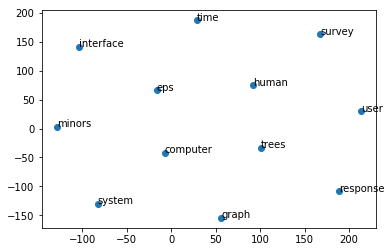

In [29]:
%matplotlib inline

import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos)
plt.show()    

There are many other implementations of Word2Vev like GloVe or using negative sampling. A nice implementation was done at (Warsaw University)[https://lamyiowce.github.io/word2viz/]

### References

[1] Natural Language Processing with Python, Edward Loper, Ewan Klein, Steven Bird. O'Reilly 2009

[2] Applied Text Analysis with Python, Tony Ojeda , Rebecca Bilbro , Benjamin Bengfort. O'Reilly 2018

[3] Feature Engineering for Machine Learning, Amanda Casari , Alice Zheng. O'Reilly 2018